# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print("The first column is selected because the first element of e_1 is 1 and all other elements are 0.")
print("Since each row will be a dot product of e_1 and the corresponding row in A, the first row will be:")
print("Column 1, row 1 * 1 + column 2, row 1 * 0 + column 3, row 1 * 0 = column 1 row 1 of A")
print(A @ e_1)
print("\nFor the exact same reason, this will be the second column:")
print(A @ e_2)
print("\nFor the exact same reason, this will be the third column:")
print(A @ e_3)

The first column is selected because the first element of e_1 is 1 and all other elements are 0.
Since each row will be a dot product of e_1 and the corresponding row in A, the first row will be:
Column 1, row 1 * 1 + column 2, row 1 * 0 + column 3, row 1 * 0 = column 1 row 1 of A
[1 4 7]

For the exact same reason, this will be the second column:
[2 5 8]

For the exact same reason, this will be the third column:
[3 6 9]


b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)
print("This multiplication will result in a vector with each of the rows of A added up.")
print("This is because this multiplication does a dot product between each row of A and u.")
print(A @ u)

This multiplication will result in a vector with each of the rows of A added up.
This is because this multiplication does a dot product between each row of A and u.
[ 6. 15. 24.]


c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

print("Multiplying any vector by an identity matrix results in the same vector.")
print("The is because the element corresponding to position i of the vector is multiplied by the element corresponding to position i of the identity matrix, which is 1 and all other elements in that row are 0.")
print(A @ x)

Multiplying any vector by an identity matrix results in the same vector.
The is because the element corresponding to position i of the vector is multiplied by the element corresponding to position i of the identity matrix, which is 1 and all other elements in that row are 0.
[-2  4 11]


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

print("This will shuffle around the numbers in the vector if there is a 1 in each row and a 1 in each column and 0s everywhere else.")
print("Where r is the row and c is the column, having a 1 in the r, c position will result in the c-th element of the vector being placed in the r-th position in the new vector.")
print(A @ x)
print("If they sum to 1 but aren't themselves 1, then it will take a weighted average of the elements in the vector," \
" with element i's weight corresponding with the value corresponding to column i in any given row.")
A = np.array([ [0.5,0.3,0.2],
              [0.5,0.2,0.3],
              [0,0.5,0.5]])
print(A @ x)

This will shuffle around the numbers in the vector if there is a 1 in each row and a 1 in each column and 0s everywhere else.
Where r is the row and c is the column, having a 1 in the r, c position will result in the c-th element of the vector being placed in the r-th position in the new vector.
[11 -2  4]
If they sum to 1 but aren't themselves 1, then it will take a weighted average of the elements in the vector, with element i's weight corresponding with the value corresponding to column i in any given row.
[2.4 3.1 7.5]


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [6]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [7]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)
print("Each row of the resultant vectors is the probability of transitioning from position i to each position in the state space" \
" from position i where i is the element of the e_i that is 1.")

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]
Each row of the resultant vectors is the probability of transitioning from position i to each position in the state space from position i where i is the element of the e_i that is 1.


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [8]:
e = e_1
for i in range(5):
    e = A @ e
print(e)

e = e_2
for i in range(5):
    e = A @ e
print(e)

e = e_3
for i in range(5):
    e = A @ e
print(e)

print("As you add more iterations, the vectors seem to converge to the same stable state likelihood.")

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]
As you add more iterations, the vectors seem to converge to the same stable state likelihood.


*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$
- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?

$$
T [1,0] = \left[ \begin{array}{cc} .25*1 + .5*0 &
.75*1 + .5*0 \end{array}\right].
$$

Each element in the vector is the probability you are at that i-th state after 1 timestep when starting at state 1.

- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)

$$
TT [1,0] = \left[ \begin{array}{cc} .25*.25 + .5*.75 &
.75*.25 + .5*.5 \end{array}\right].
$$

Each element in the vector is the probability you are at that i-th state after 2 timesteps when starting at state 1.

- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?

After 28 iterations, it converges to 
$$
T^{28} [1,0] = \left[ \begin{array}{cc} .4 & .6 \end{array}\right].
$$

- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?

We get the same result, it takes 28 iterations to converge and we converge to the same vector.

- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 

In [9]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])
print("A@[1,0]")
print(T @ np.array([1, 0]))
print("A^2@[1,0]")
print(T @ T @ np.array([1, 0]))
print("A^2@[1,0]")
def exp_matmul(T, n):
    if n == 0:
        return np.array([1, 0])
    else:
        return T @ exp_matmul(T, n-1)
n = 2
while True:
    if (exp_matmul(T, n) == exp_matmul(T, n-1)).all():
        print(n)
        break
    n += 1
print("The number of iterations required to converge to the same stable state is ", n-1)
print(f"The (stable) state at {n} is ", exp_matmul(T, n))
print(f"The (stable) state at {n-1} is ", exp_matmul(T, n-1))

print("\nConvergence from [0,1]:")
def exp_matmul(T, n):
    if n == 0:
        return np.array([0, 1])
    else:
        return T @ exp_matmul(T, n-1)
n = 2
while True:
    if (exp_matmul(T, n) == exp_matmul(T, n-1)).all():
        print(n)
        break
    n += 1
print("The number of iterations required to converge to the same stable state is ", n-1)
print(f"The (stable) state at {n} is ", exp_matmul(T, n))
print(f"The (stable) state at {n-1} is ", exp_matmul(T, n-1))

A@[1,0]
[0.25 0.75]
A^2@[1,0]
[0.4375 0.5625]
A^2@[1,0]
29
The number of iterations required to converge to the same stable state is  28
The (stable) state at 29 is  [0.4 0.6]
The (stable) state at 28 is  [0.4 0.6]

Convergence from [0,1]:
29
The number of iterations required to converge to the same stable state is  28
The (stable) state at 29 is  [0.4 0.6]
The (stable) state at 28 is  [0.4 0.6]


3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?

In [10]:
import os
import pandas as pd
os.chdir('/home/blalo/uva/understanding_uncertainty/group')
df = pd.read_csv('./data/cville_weather.csv')
df = df.sort_values(by='DATE')
df.head(3).T

,0,1,271
STATION,US1VACRC002,US1VACRC002,US1VAAB0010
NAME,"CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 8.4 W, VA US"
DATE,2024-01-04,2024-01-07,2024-01-08
DAPR,NaN,NaN,NaN
DAPR_ATTRIBUTES,NaN,NaN,NaN
MDPR,NaN,NaN,NaN
MDPR_ATTRIBUTES,NaN,NaN,NaN
PRCP,0.03,1.08,0.0
PRCP_ATTRIBUTES,",,N",",,N",",,N"
SNOW,NaN,NaN,0.0


In [11]:
# Count missing values in all columns separately
for col in df.columns:
    print(col, df[col].isna().sum())
print("\nThere seems to be significant missing data issues :(")

STATION 0
NAME 0
DATE 0
DAPR 399
DAPR_ATTRIBUTES 399
MDPR 399
MDPR_ATTRIBUTES 399
PRCP 12
PRCP_ATTRIBUTES 12
SNOW 188
SNOW_ATTRIBUTES 188
SNWD 410
SNWD_ATTRIBUTES 410

There seems to be significant missing data issues :(


- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.

In [12]:
df['rain'] = df['PRCP'] > 0
df['rain'] = df['rain'].astype(int)
df.head(3).T

,0,1,271
STATION,US1VACRC002,US1VACRC002,US1VAAB0010
NAME,"CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 8.4 W, VA US"
DATE,2024-01-04,2024-01-07,2024-01-08
DAPR,NaN,NaN,NaN
DAPR_ATTRIBUTES,NaN,NaN,NaN
MDPR,NaN,NaN,NaN
MDPR_ATTRIBUTES,NaN,NaN,NaN
PRCP,0.03,1.08,0.0
PRCP_ATTRIBUTES,",,N",",,N",",,N"
SNOW,NaN,NaN,0.0


- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 

In [13]:
df_rain_transitions = pd.crosstab(df['rain'].shift(1), df['rain'])
T = df_rain_transitions.div(df_rain_transitions.sum(axis=1), axis=0)
T = (T.values).T
T

array([[0.76293103, 0.30898876],
       [0.23706897, 0.69101124]])

- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?

In [17]:
print("Odds of rain if it rained yesterday: ", T[1][1])
print("Odds of rain if it did not rain yesterday: ", T[1][0])

Odds of rain if it rained yesterday:  0.6910112359550562
Odds of rain if it did not rain yesterday:  0.23706896551724138


- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?

In [15]:
print("\nConvergence from rainy day:")
def exp_matmul(T, n, init_state):
    if n == 0:
        return init_state
    else:
        return T @ exp_matmul(T, n-1, init_state)
n = 2
while True:
    if (exp_matmul(T, n, np.array([0, 1])) == exp_matmul(T, n-1, np.array([0, 1]))).all():
        break
    n += 1
print("The number of iterations required to converge to the same stable state is ", n-1)
print(f"The (stable) state at {n} is ", exp_matmul(T, n, np.array([0, 1])))
print(f"The (stable) state at {n-1} is ", exp_matmul(T, n-1, np.array([0, 1])))

print("\nConvergence from non-rainy day:")
n = 2
while True:
    if (exp_matmul(T, n, np.array([1, 0])) == exp_matmul(T, n-1, np.array([1, 0]))).all():
        break
    n += 1
print("The number of iterations required to converge to the same stable state is ", n-1)
print(f"The (stable) state at {n} is ", exp_matmul(T, n, np.array([1, 0])))
print(f"The (stable) state at {n-1} is ", exp_matmul(T, n-1, np.array([1, 0])))


Convergence from rainy day:
The number of iterations required to converge to the same stable state is  47
The (stable) state at 48 is  [0.56585366 0.43414634]
The (stable) state at 47 is  [0.56585366 0.43414634]

Convergence from non-rainy day:
The number of iterations required to converge to the same stable state is  48
The (stable) state at 49 is  [0.56585366 0.43414634]
The (stable) state at 48 is  [0.56585366 0.43414634]


- Conditional on being rainy, plot a KDE of the `PRCP` variable.

<Axes: xlabel='PRCP', ylabel='Density'>

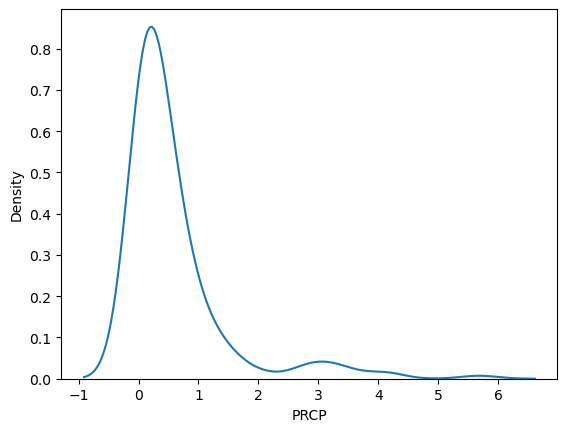

In [16]:
import seaborn as sns
df_rained = df[df['rain'] == 1]
sns.kdeplot(df_rained['PRCP'])

- Describe one way of making your model better for forecasting and simulation the weather.

We could use n-gram states where each state is a sequence of previous states. We would then be using the weather today and yesterday to predict the weather tomorrow and the next day.

We could also split the data into 4 categories corresponding to the 4 seasons of the year and make a model for each season.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.


- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?


- Explain why taxicabs are most likely order 1, and not 2 or more.


- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips


- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?